NMF 非负矩阵分解(Non-negative Matrix Factorization)实践 - CSDN博客  https://blog.csdn.net/qq_26225295/article/details/51165858

In [5]:
import numpy as np
from sklearn.decomposition import NMF


In [2]:
item = [
    '希特勒回来了', '死侍', '房间', '龙虾', '大空头',
    '极盗者', '裁缝', '八恶人', '实习生', '间谍之桥',
]

In [8]:
len(item)

10

In [3]:
user = ['五柳君', '帕格尼六', '木村静香', 'WTF', 'airyyouth',
        '橙子c', '秋月白', 'clavin_kong', 'olit', 'You_某人',
        '凛冬将至', 'Rusty', '噢！你看！', 'Aron', 'ErDong Chen']

In [9]:
len(user)

15

In [6]:
# 行：电影
# 列：人名
# 下面的矩阵表示人对电影的评分
RATE_MATRIX = np.array(
    [[5, 5, 3, 0, 5, 5, 4, 3, 2, 1, 4, 1, 3, 4, 5],
     [5, 0, 4, 0, 4, 4, 3, 2, 1, 2, 4, 4, 3, 4, 0],
     [0, 3, 0, 5, 4, 5, 0, 4, 4, 5, 3, 0, 0, 0, 0],
     [5, 4, 3, 3, 5, 5, 0, 1, 1, 3, 4, 5, 0, 2, 4],
     [5, 4, 3, 3, 5, 5, 3, 3, 3, 4, 5, 0, 5, 2, 4],
     [5, 4, 2, 2, 0, 5, 3, 3, 3, 4, 4, 4, 5, 2, 5],
     [5, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
     [5, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
     [5, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
     [5, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
)

In [11]:
RATE_MATRIX.shape

(10, 15)

In [14]:
# 设置主题为 2 
nmf_mode = NMF(n_components=2)
item_dis = nmf_mode.fit_transform(RATE_MATRIX)
user_dis = nmf_mode.components_

In [23]:
print('电影的主题分布：')
print(item_dis)
print('用户的主题分布：')
print(user_dis)
print('电影数量',item_dis.shape)
print('用户数量',user_dis.shape)

电影的主题分布：
[[2.20401687 1.53852775]
 [1.9083879  0.83214869]
 [1.95596132 0.        ]
 [1.87637018 1.65573674]
 [2.48959328 1.41632377]
 [2.38108536 1.08460665]
 [0.         2.29342959]
 [0.         2.27353353]
 [0.         2.32513876]
 [0.         2.23196277]]
用户的主题分布：
[[0.81240799 0.71153396 0.47062388 0.43807017 1.39456425 2.24323719
  1.02417204 1.25356481 1.10517661 1.47624595 1.84626347 0.97437242
  1.14921406 0.8159644  1.14200028]
 [2.23910382 1.70186882 1.34300272 1.09192602 0.68045441 0.
  0.0542231  0.         0.         0.         0.04426552 0.12260418
  0.34109613 0.51642843 0.6157604 ]]
电影数量 (10, 2)
用户数量 (2, 15)


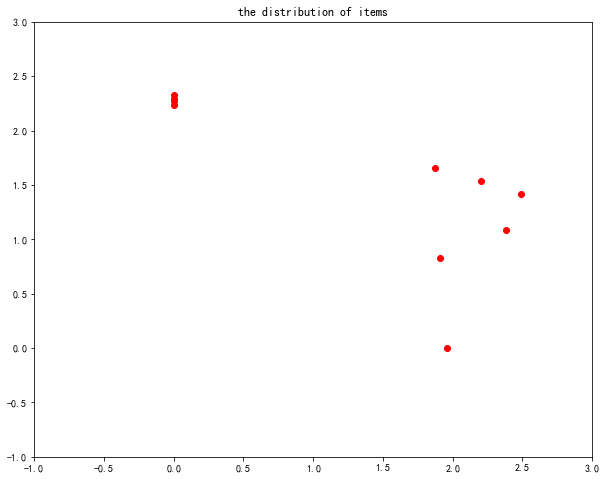

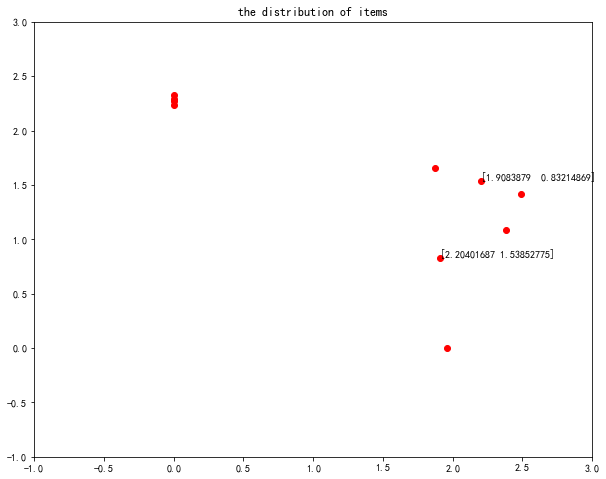

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,8))
plt.plot(item_dis[:,0],item_dis[:,1],'ro')
plt.xlim((-1,3))
plt.ylim((-1,3))
plt.title('the distribution of items')


count=1
# 把电影的标题和电影的坐标关联在一起
zip_item = zip(item,item_dis)

for item in zip_item:
    item_name = item[0]
    data= item[1]
    plt.text(data[0],data[1],item_name)
    

plt.show()

In [27]:
item_dis.shape

(10, 2)